In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/capstone_2_final_preprocessed_data.csv')

In [4]:
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver_ID,...,RecFumbPlayer,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,14,3,2.0,12:06,13,1626.0,54,PIT,42.0,42.0,10,38,0.0,1.0,TEN,PIT,(12:06) K.Collins pass short left to B.Scaife ...,1,1,0,0,0,0,Pass,00-0003292,1,Complete,Short,1,0,0,left,0,None,0,left,tackle,00-0023612,...,K.Fox,0,0,0,0,7.0,7.0,0.0,-0.0,PIT,TEN,0,None,3,3,3,3,3,0.001336,0.081366,0.000500,0.127569,0.361496,0.003636,0.424096,0.0,0.0,2.922348,-5.607747,-5.607747,0.000000,0.417641,0.582359,0.574091,0.425909,0.582359,-0.156450,-0.156450,0.000000,2009
1,2009-09-10,2009091000,15,3,4.0,10:12,11,1512.0,48,TEN,45.0,45.0,1,9,0.0,1.0,PIT,TEN,(10:12) (Punt formation) D.Sepulveda punts 38 ...,1,0,0,0,0,0,Punt,None,0,Complete,Short,0,0,0,left,0,None,0,left,tackle,None,...,K.Fox,0,0,0,0,7.0,7.0,0.0,-0.0,PIT,TEN,0,None,3,3,3,3,3,0.003482,0.148144,0.001430,0.236492,0.295397,0.006030,0.309024,0.0,0.0,0.958681,0.096593,0.000000,0.000000,0.515547,0.484453,0.549183,0.450817,0.515547,0.033635,0.000000,0.000000,2009
2,2009-09-10,2009091000,23,4,1.0,01:03,2,63.0,57,TEN,34.0,34.0,10,54,0.0,1.0,PIT,TEN,(1:03) (Shotgun) B.Roethlisberger pass deep mi...,1,30,0,0,0,0,Pass,00-0022924,1,Complete,Deep,16,14,0,middle,0,None,0,left,tackle,00-0017162,...,S.Tulloch,0,0,0,0,10.0,10.0,0.0,-0.0,PIT,TEN,0,None,2,2,3,2,3,0.384776,0.023877,0.000103,0.017213,0.308130,0.000673,0.265228,0.0,0.0,2.590006,-2.766193,0.663581,-3.429773,0.798849,0.201151,0.415150,0.584850,0.798849,-0.383699,0.060954,-0.444653,2009
3,2009-09-13,2009091304,7,2,0.0,11:09,12,2469.0,51,MIN,30.0,30.0,0,0,0.0,1.0,CLE,MIN,R.Longwell kicks 70 yards from MIN 30 to CLE 0...,1,27,0,0,0,0,Kickoff,None,0,Complete,Deep,0,0,0,middle,0,None,0,left,tackle,None,...,S.Tulloch,0,0,0,0,3.0,10.0,-7.0,7.0,CLE,MIN,0,None,3,3,3,3,3,0.125554,0.151593,0.005507,0.227161,0.193684,0.003012,0.293488,0.0,0.0,0.585576,0.433691,0.000000,0.000000,0.269452,0.730548,0.283650,0.716350,0.269452,0.014197,0.000000,0.000000,2009
4,2009-09-13,2009091304,7,2,2.0,10:17,11,2417.0,43,CLE,27.0,73.0,8,73,0.0,1.0,CLE,MIN,(10:17) B.Quinn pass short middle to L.Vickers...,1,12,0,0,0,0,Pass,00-0025409,1,Complete,Short,2,10,0,middle,0,None,0,left,tackle,00-0024394,...,S.Tulloch,0,1,0,0,3.0,10.0,-7.0,7.0,CLE,MIN,1,MIN,3,3,3,3,2,0.138326,0.148025,0.003850,0.220793,0.197775,0.003300,0.287931,0.0,0.0,0.618122,1.505180,-0.523761,2.028941,0.273260,0.726740,0.338336,0.661664,0.273260,0.065076,-0.016060,0.081136,2009


Shape of data

In [6]:
data.shape

(362447, 83)

Basic info of the data

In [7]:
pd.set_option('display.max_rows', 500)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         362447 non-null  object 
 1   GameID                       362447 non-null  int64  
 2   Drive                        362447 non-null  int64  
 3   qtr                          362447 non-null  int64  
 4   down                         362447 non-null  float64
 5   time                         362447 non-null  object 
 6   TimeUnder                    362447 non-null  int64  
 7   TimeSecs                     362447 non-null  float64
 8   PlayTimeDiff                 362447 non-null  int64  
 9   SideofField                  362447 non-null  object 
 10  yrdln                        362447 non-null  float64
 11  yrdline100                   362447 non-null  float64
 12  ydstogo                      362447 non-null  int64  
 13 

Total number of unique values in each column

In [8]:
for a in data.columns:
  print(a,':',data[a].nunique())

Date : 376
GameID : 2048
Drive : 35
qtr : 5
down : 5
time : 901
TimeUnder : 16
TimeSecs : 4329
PlayTimeDiff : 62
SideofField : 36
yrdln : 50
yrdline100 : 99
ydstogo : 47
ydsnet : 151
GoalToGo : 2
FirstDown : 2
posteam : 34
DefensiveTeam : 34
desc : 335004
PlayAttempted : 1
Yards.Gained : 127
sp : 2
Touchdown : 2
Safety : 2
Onsidekick : 2
PlayType : 15
Passer_ID : 313
PassAttempt : 2
PassOutcome : 2
PassLength : 3
AirYards : 109
YardsAfterCatch : 115
QBHit : 2
PassLocation : 3
InterceptionThrown : 2
Rusher_ID : 989
RushAttempt : 2
RunLocation : 3
RunGap : 3
Receiver_ID : 1376
Reception : 2
Fumble : 2
RecFumbTeam : 34
RecFumbPlayer : 1696
Sack : 2
Challenge.Replay : 2
Accepted.Penalty : 2
Penalty.Yards : 59
PosTeamScore : 61
DefTeamScore : 60
ScoreDiff : 108
AbsScoreDiff : 108
HomeTeam : 34
AwayTeam : 34
Timeout_Indicator : 2
Timeout_Team : 35
posteam_timeouts_pre : 4
HomeTimeouts_Remaining_Pre : 7
AwayTimeouts_Remaining_Pre : 5
HomeTimeouts_Remaining_Post : 7
AwayTimeouts_Remaining_Post

All the unique values in each feature

In [9]:
for a in data.columns:
  print(a,':',data[a].unique())
  print('*'*50)

Date : ['2009-09-10' '2009-09-13' '2009-09-14' '2009-09-20' '2009-09-21'
 '2009-09-27' '2009-09-28' '2009-10-04' '2009-10-05' '2009-10-11'
 '2009-10-18' '2009-10-19' '2009-10-25' '2009-10-26' '2009-11-01'
 '2009-11-02' '2009-11-08' '2009-11-09' '2009-11-12' '2009-11-15'
 '2009-11-16' '2009-11-19' '2009-11-22' '2009-11-23' '2009-11-26'
 '2009-11-29' '2009-11-30' '2009-12-03' '2009-12-06' '2009-12-07'
 '2009-12-10' '2009-12-13' '2009-12-14' '2009-12-17' '2009-12-19'
 '2009-12-20' '2009-12-21' '2009-12-25' '2009-12-27' '2009-12-28'
 '2010-01-03' '2010-09-09' '2010-09-12' '2010-09-13' '2010-09-19'
 '2010-09-20' '2010-09-26' '2010-09-27' '2010-10-03' '2010-10-10'
 '2010-10-11' '2010-10-17' '2010-10-18' '2010-10-24' '2010-10-25'
 '2010-10-31' '2010-11-01' '2010-11-07' '2010-11-08' '2010-11-11'
 '2010-11-14' '2010-11-15' '2010-11-18' '2010-11-21' '2010-11-22'
 '2010-11-25' '2010-11-28' '2010-11-29' '2010-12-02' '2010-12-05'
 '2010-12-06' '2010-12-09' '2010-12-12' '2010-12-13' '2010-12-19'
 '2

Text(0.5, 1.0, 'Total number of occurances of each Drive')

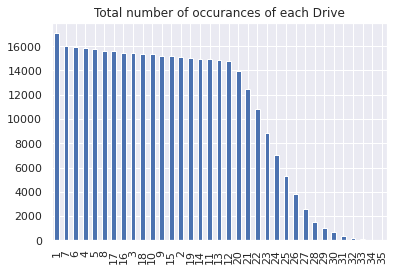

In [10]:
data['Drive'].value_counts().plot(kind = 'bar')
plt.title('Total number of occurances of each Drive')

Text(0.5, 1.0, 'Total number of occurances of each Quarter')

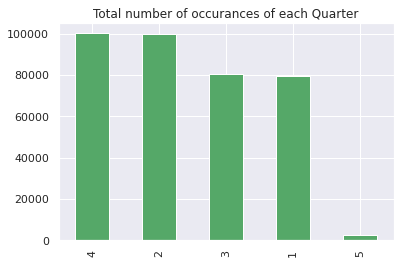

In [11]:
data['qtr'].value_counts().plot(kind = 'bar',color='g')
plt.title('Total number of occurances of each Quarter')

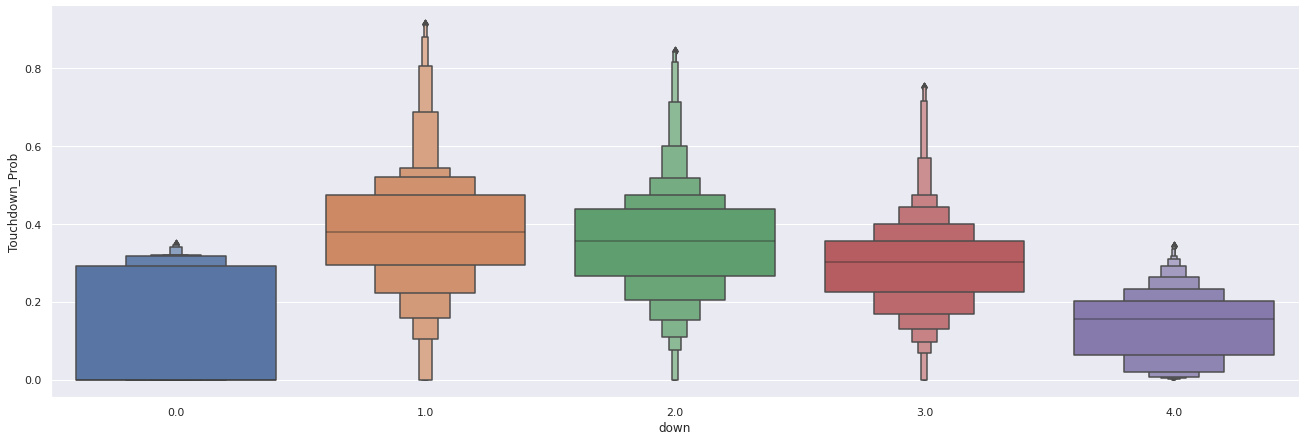

In [12]:

sns.catplot(y = "Touchdown_Prob", x = "down", data = data.sort_values("Touchdown_Prob", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

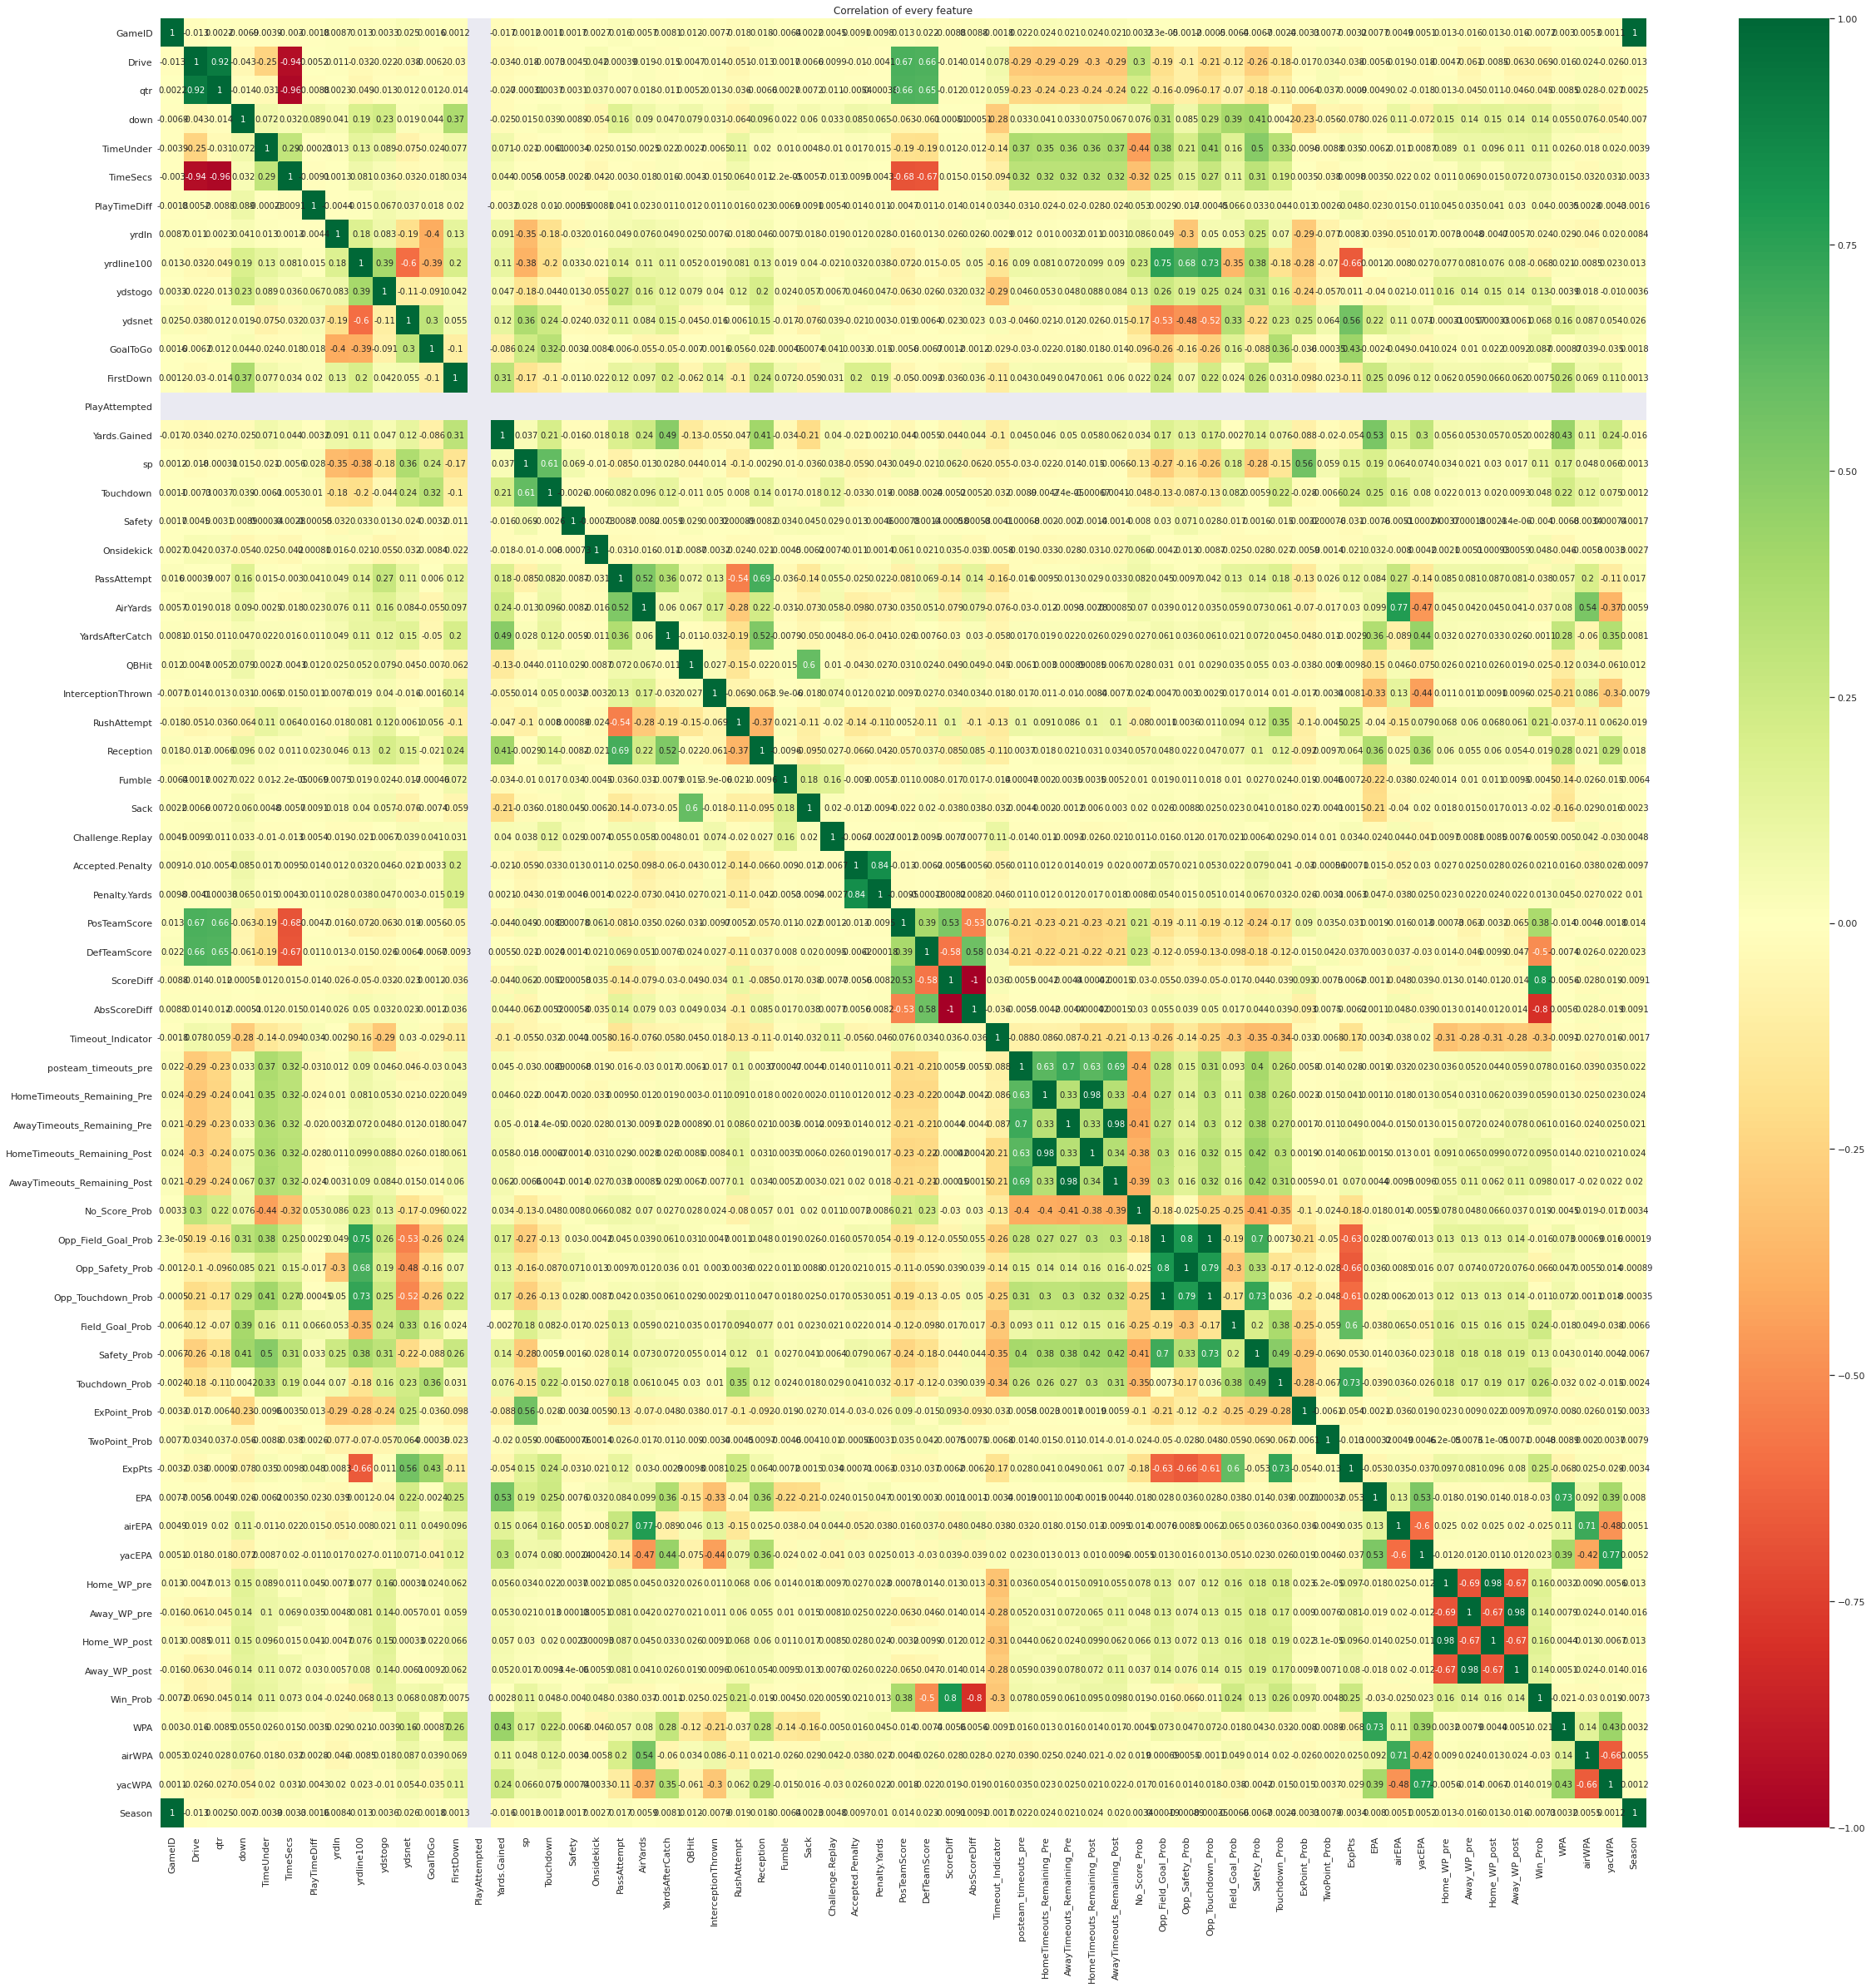

In [13]:
plt.figure(figsize = (40,40))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.title('Correlation of every feature')
plt.show()

In [14]:
ss=data['Season'].value_counts(normalize=True)*100
ss

2015    12.727102
2016    12.618673
2014    12.554111
2012    12.530108
2013    12.484032
2011    12.434922
2010    12.346909
2009    12.304144
Name: Season, dtype: float64

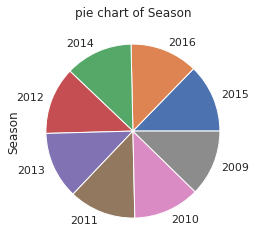

In [15]:
ss.plot.pie()
plt.title('pie chart of Season')
plt.show()

In [16]:
data['Date'] =  pd.to_datetime(data['Date'], errors='coerce')


Text(0.5, 1.0, 'Count of GameID according to the Season.')

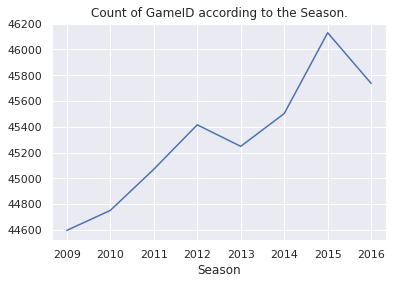

In [17]:
data.groupby(data['Season'])['GameID'].count().plot()
plt.title('Count of GameID according to the Season.')

Text(0.5, 0, 'Home Team')

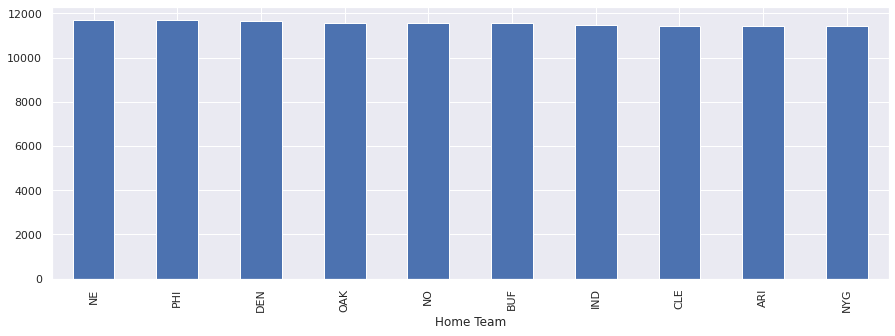

In [18]:
data['HomeTeam'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.xlabel('Home Team')

Text(0.5, 0, 'Away Team')

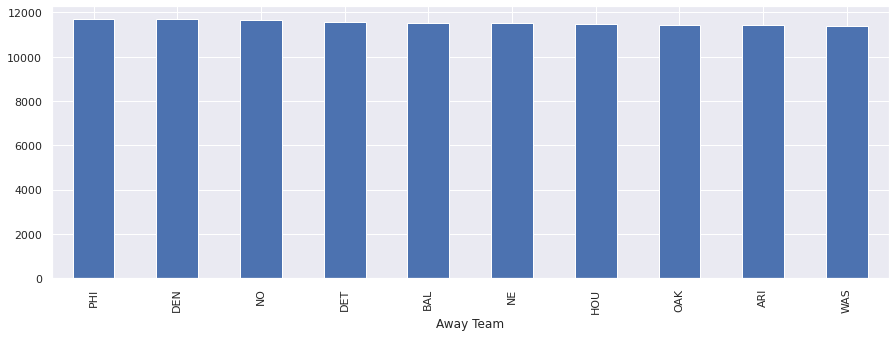

In [19]:
data['AwayTeam'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.xlabel('Away Team')

In [20]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fingertips training/Capstone_Project_2to.csv')
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [21]:
df = df.replace(to_replace=np.nan,value=-1)

In [22]:
continuous_features = ['TimeSecs', 'PlayTimeDiff', 'yrdln', 'yrdline100',
                       'ydstogo', 'ydsnet', 'Yards.Gained', 'Penalty.Yards',
                       'ScoreDiff', 'AbsScoreDiff']

ordinal_features = ['Drive', 'qtr', 'down']
binary_features = ['GoalToGo', 'FirstDown','sp', 'Touchdown', 'Safety', 'Fumble']
categorical_features = df.columns.difference(continuous_features).difference(ordinal_features)

In [23]:
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df[binary_features] = df[binary_features].astype(np.int8)

In [24]:
df['PassOutcome'].replace(['Complete', 'Incomplete Pass'], [1, 0], inplace=True)


In [25]:
pass_plays = df[df['PlayType'] == "Pass"]
pass_plays_grouped = pass_plays.groupby(by=['Passer'])

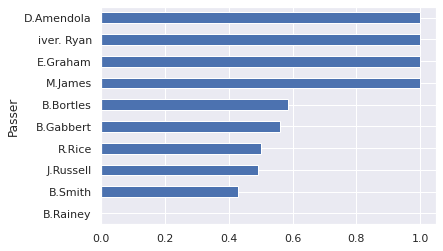

In [26]:
completion_rate = pass_plays_grouped.PassOutcome.sum() / pass_plays_grouped.PassOutcome.count()
completion_rate_sampled = completion_rate.sample(10)
completion_rate_sampled.sort_values(inplace=True)
completion_rate_sampled.plot(kind='barh')

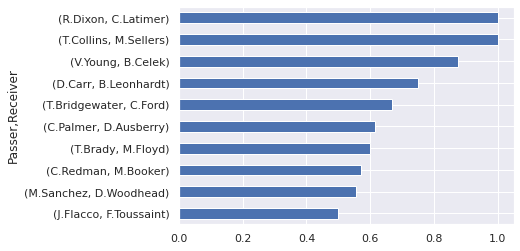

In [27]:
pass_plays_grouped = pass_plays.groupby(by=['Passer', 'Receiver'])
completion_rate = pass_plays_grouped.PassOutcome.sum() / pass_plays_grouped.PassOutcome.count()
completion_rate_sampled = completion_rate.sample(10)
completion_rate_sampled.sort_values(inplace=True)
completion_rate_sampled.plot(kind='barh')

In [28]:
def_play_groups = df.groupby("DefensiveTeam")

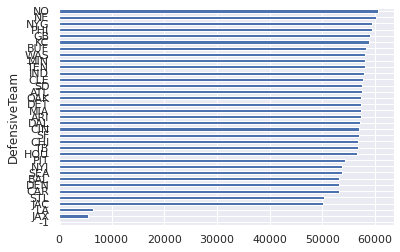

In [29]:
def_yards_allowed = def_play_groups["Yards.Gained"].sum()
def_yards_allowed.sort_values(inplace=True)
def_yards_allowed.plot(kind='barh')

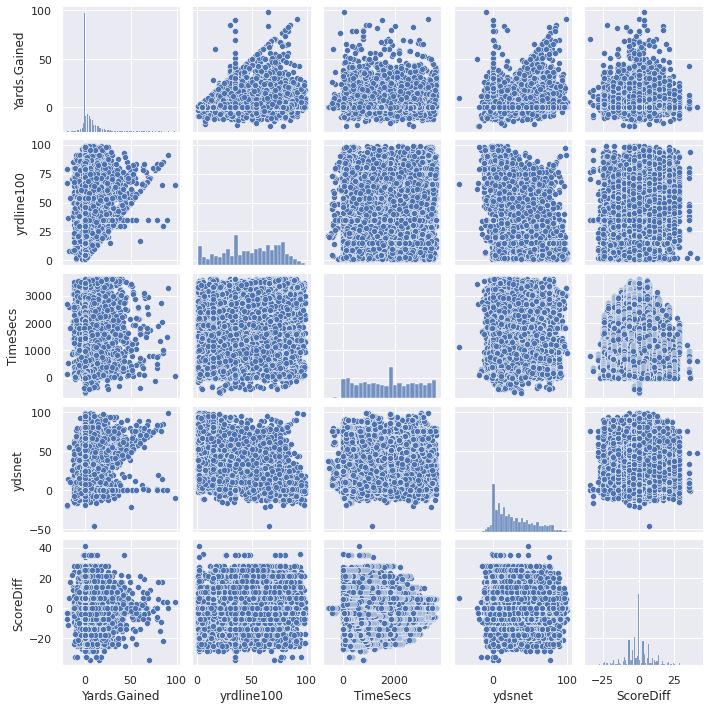

In [37]:
df_plot = df[["Yards.Gained", "yrdline100", "TimeSecs", "ydsnet", "ScoreDiff", "posteam"]]
df_plot = df_plot[df_plot.posteam == "DAL"]
sns.pairplot(df_plot, size=2)

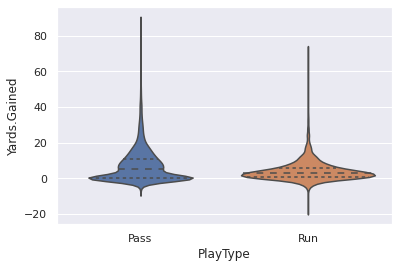

In [39]:
den_plays = df[df.posteam == "DEN"]
den_passes = den_plays[den_plays.PlayType == "Pass"]
den_runs = den_plays[den_plays.PlayType == "Run"]
den_plays = pd.concat([den_passes, den_runs])
sns.violinplot(x="PlayType", y="Yards.Gained", data=den_plays, inner="quart")